<a href="https://colab.research.google.com/github/IsfaquethedataAnalyst/Data_Analyst/blob/main/tSNE_CUDA_vs_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Data Science

[This GPU Accelerated tSNE Can Be Upto 700x Faster Than Sklearn](https://www.blog.dailydoseofds.com/p/this-gpu-accelerated-tsne-can-be)

Author: Isfaque Ansari

Before running this notebook: Go to "Runtime" -> "Change Runtime Type" -> Select "GPU T4"

In [1]:
!pip install -q condacolab

import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:12
🔁 Restarting kernel...


In [1]:
!conda install tsnecuda -c conda-forge

Channels:
 - conda-forge
Platform: linux-64
Solving environment: / - \ done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.5.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - tsnecuda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.2.2   |       hbcca054_0         152 KB  conda-forge
    certifi-2024.2.2           |     pyhd8ed1ab_0         157 KB  conda-forge
    cudatoolkit-11.8.0         |      h4ba93d1_13       682.5 MB  conda-forge
    gflags-2.2.2               |    he1b5a44_1004         114 KB  conda-forge
    libblas-3.9.0              |22_linux64_openblas          14 KB  conda-forge
    libcblas-3.9.0             |22_linux64_openblas          14 KB  conda-forge
    libfaiss

Imports

In [2]:
import tsnecuda
tsnecuda.test() # this should work without any error

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml

sns.set()

In [4]:
colors = ['#fe7c73', '#2471A3', '#3498DB', '#27AE60', '#82E0AA', '#D35400', '#5D6D7E', '#E74C3C', '#21618C', '#B7950B', '#46C7C7', '#00B9FF']

Load dataset

In [5]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784')

# Extract features and labels
X, y = mnist['data'], mnist['target']

# Convert to numpy arrays
X = X.to_numpy().astype('float32')
y = y.to_numpy().astype('int')

# Print the shape of the arrays
print("Shape of features (X):", X.shape)
print("Shape of labels (y):", y.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Shape of features (X): (70000, 784)
Shape of labels (y): (70000,)


Sample rows

In [6]:
# Get the number of rows in X
num_rows = X.shape[0]

# Randomly sample 8,000 indices
random_indices = np.random.choice(num_rows, size=8000, replace=False)

# Select the rows based on the randomly sampled indices
sampled_X = X[random_indices]
sampled_y = y[random_indices]

# tSNE CUDA

In [7]:
from tsnecuda import TSNE as TSNE_GPU

In [8]:
%%timeit

X_embedded_gpu = TSNE_GPU(n_components=2, learning_rate=20, perplexity=25).fit_transform(sampled_X)

3.34 s ± 66.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
X_embedded_gpu = TSNE_GPU(n_components=2, learning_rate=20, perplexity=25).fit_transform(sampled_X)

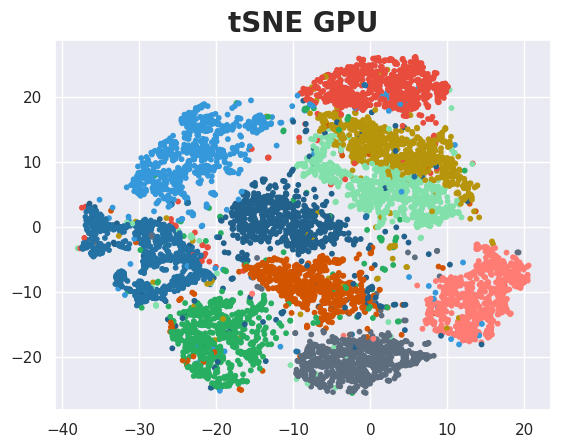

In [10]:
fig, ax = plt.subplots()

ax.scatter(X_embedded_gpu[:, 0], X_embedded_gpu[:, 1], c = [colors[i] for i in sampled_y], s=10)

ax.set_title("tSNE GPU", fontsize=20, weight="bold")
plt.savefig("./tsne_gpu.jpeg", dpi=300, bbox_inches="tight")

plt.show()

# tSNE Sklearn

In [11]:
from sklearn.manifold import TSNE as TSNE_CPU

In [12]:
%%timeit -n 1 -r 1

X_embedded_cpu = TSNE_CPU(n_components=2, learning_rate=20, perplexity=25).fit_transform(sampled_X)

1min 6s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [13]:
X_embedded_cpu = TSNE_CPU(n_components=2, learning_rate=20, perplexity=25).fit_transform(sampled_X)

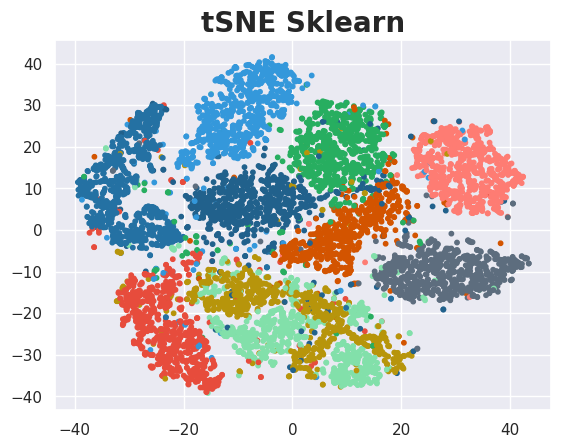

In [14]:
fig, ax = plt.subplots()

ax.scatter(X_embedded_cpu[:, 0], X_embedded_cpu[:, 1], c = [colors[i] for i in sampled_y], s=10)

ax.set_title("tSNE Sklearn", fontsize=20, weight="bold")
plt.savefig("./tsne_cpu.jpeg", dpi=300, bbox_inches="tight")
plt.show()